# Importing required libraries

- **Bamboolib** is a free library that gives pandas a GUI interface. It makes it very easy to get graphs and manipulate the rows and columns of the data frame

- **pandas** is the most popular data frame library in python. it just makes it easy to store and manipulate data 

In [1]:
import bamboolib as bam
import pandas as pd
import plotly.express as px

# Getting the data from the google sheet

- the following block of code just reads the data from the google sheets where the survey data is going to.(https://docs.google.com/spreadsheets/d/12ojjnk25qPNqnhrhIPjBmfLIDbD3aoynV7emSwuaK7Y/edit#gid=324197163)



In [2]:
gsheetid = "12ojjnk25qPNqnhrhIPjBmfLIDbD3aoynV7emSwuaK7Y"
sheet_name = "data"
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)
df = pd.read_csv(gsheet_url) 

### Dropping Unncessary Columns

In [3]:
df = df.drop(columns=['Timestamp']) #The Timestamp column really is not needed in our study

In [4]:
df

,in person?,major,labs?,num_of_units,easy_internet?,max_screentime,more_distracted_at_home?,commute_time_mins,personality_rating,Unnamed: 10
0,No,Math,Yes,14.00,No,130,Yes,34.0,2,NaN
1,Yes,Humanities/Social Sciences,No,12.00,Yes,40,Yes,35.0,4,NaN
2,No,Science,Yes,18.00,Yes,180,No,20.0,1,NaN
3,Yes,Engineering/CS/DS,Yes,14.00,Yes,240,Yes,41.0,3,NaN
4,Yes,Engineering/CS/DS,No,20.00,Yes,240,Yes,25.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...
123,No,Science,Yes,16.00,Yes,240,No,15.0,1,NaN
124,No,Humanities/Social Sciences,No,12.50,Yes,60,Yes,50.0,4,NaN
125,No,Science,Yes,21.00,Yes,180,No,30.0,2,NaN
126,No,Engineering/CS/DS,No,12.33,Yes,180,No,30.0,2,NaN


# Looking at relationships between the data

- bamboolib has a function patterns() which shows the predictive powet score of all the variables. Think of it as a better version of coerrelation. We will still use a coerrelation matrix later on though

In [25]:
bam.patterns(df)

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='patterns', _dom_classes=('bambo…

In [26]:
de = df
de = de.replace('No', 0)
de = de.replace('Yes', 1)
de = de.replace('Math', 0)
de = de.replace('Humanities/Social Sciences', 1)
de = de.replace('Science', 2)
de = de.replace('Engineering/CS/DS', 3)

In [27]:
bam.correlations(de)

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='correlations', _dom_classes=('b…

In [28]:
fig = px.pie(df, names='in person?')
fig

In [29]:
bam.plot(df, 'in person?', 'more_distracted_at_home?')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [30]:
bam.plot(df, 'in person?', 'commute_time_mins')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [31]:
bam.plot(df, 'num_of_units', 'in person?')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [32]:
bam.plot(df, 'max_screentime', 'in person?')

TabSection(children=(BrowserCheck(), HBox(children=(Tab(closable=False, title='plot', _dom_classes=('bamboolib…

In [33]:
from sklearn.model_selection import train_test_split

X = de[['major', 'labs?', 'num_of_units', 'easy_internet?', 'max_screentime', 'more_distracted_at_home?', 'commute_time_mins', 'personality_rating']]
y = de[['in person?']]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13  3]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.75      0.90      0.82        10

    accuracy                           0.85        26
   macro avg       0.84      0.86      0.84        26
weighted avg       0.86      0.85      0.85        26

0.8461538461538461


In [37]:
from sklearn.metrics import plot_confusion_matrix

In [38]:
from matplotlib import pyplot as plt

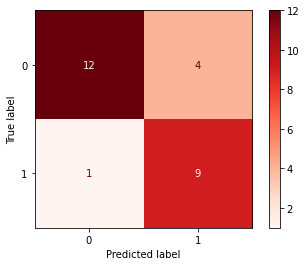

In [39]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)

Confusion matrix:

- When the actual answer was No (0), the model was right 9/10 times
- When the actual answer was Yes (1), the model was right 2/5 times

In [40]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,commute_time_mins,0.237536
1,num_of_units,0.211836
2,max_screentime,0.172232
3,more_distracted_at_home?,0.143790
4,personality_rating,0.093486
5,major,0.088624
6,labs?,0.042019
7,easy_internet?,0.010477


In [41]:
from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression(class_weight='balanced')
logclf.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [42]:
yl_pred = logclf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yl_pred)

array([[ 9,  7],
       [ 0, 10]], dtype=int64)

In [43]:
print(accuracy_score(y_test, yl_pred))

0.7307692307692307


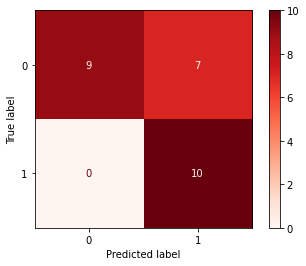

In [44]:
matrix = plot_confusion_matrix(logclf, X_test, y_test, cmap=plt.cm.Reds)